In [ ]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))

In [ ]:
set.seed(42)

In [3]:
proj <- loadArchRProject("../data/snATAC", showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
table(proj@cellColData$Sample)


CK166 CK167 CK168 CK169 CK170 CK171 CK173 CK337 CK338 CK339 CK340 CK346 CK353 
 1533  1147  1232   357   360  2905   963   556   351   916  1991   353   854 
CK380 CK381 CK382 CK385 CK387 CK388 
 1288   641   462   654  1179  2760 

In [5]:
df_sample_annotation <- read.csv("../../../snATAC/metadata/sample_annotation.csv", header = TRUE)
head(df_sample_annotation)

sample_to_region <- df_sample_annotation$region_novel
sample_to_patient <- df_sample_annotation$patient
sample_to_patient_region <- df_sample_annotation$patient_region_id
sample_to_patient_group <- df_sample_annotation$patient_group

names(sample_to_region) <- df_sample_annotation$sample_id
names(sample_to_patient) <- df_sample_annotation$sample_id
names(sample_to_patient_region) <- df_sample_annotation$sample_id
names(sample_to_patient_group) <- df_sample_annotation$sample_id

,sample_id,region_novel,patient,patient_region_id,patient_group
,<chr>,<chr>,<chr>,<chr>,<chr>
1,CK166,control,P1,control_P1,group_1
2,CK170,FZ/GT,P4,FZ/GT_P4,group_3
3,CK174,IZ/BZ,P2,IZ/BZ_P2,group_2
4,CK171,RZ/BZ,P2,RZ/BZ_P2,group_1
5,CK169,IZ,P3,IZ_P3,group_2
6,CK168,RZ/BZ,P3,RZ/BZ_P3,group_1


In [6]:
proj@cellColData$region <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_region)
proj@cellColData$patient <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_patient)
proj@cellColData$patient_region_id <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_patient_region)
proj@cellColData$patient_group <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_patient_group)

In [7]:
proj <- addIterativeLSI(
    ArchRProj = proj,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 3, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(0.2), 
        sampleCells = 10000, 
        n.start = 10
    ), 
    varFeatures = 25000, 
    dimsToUse = 1:30,
    force = TRUE
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-2f40a131df1960-Date-2021-11-13_Time-18-44-10.log
If there is an issue, please report to github with logFile!

2021-11-13 18:44:12 : Computing Total Across All Features, 0.01 mins elapsed.

2021-11-13 18:44:17 : Computing Top Features, 0.093 mins elapsed.

###########
2021-11-13 18:44:18 : Running LSI (1 of 3) on Top Features, 0.109 mins elapsed.
###########

2021-11-13 18:44:18 : Sampling Cells (N = 10010) for Estimated LSI, 0.109 mins elapsed.

2021-11-13 18:44:18 : Creating Sampled Partial Matrix, 0.109 mins elapsed.

2021-11-13 18:45:12 : Computing Estimated LSI (projectAll = FALSE), 1.016 mins elapsed.

2021-11-13 18:45:59 : Identifying Clusters, 1.802 mins elapsed.

Warning message:
“The following arguments are not used: row.names”
2021-11-13 18:46:17 : Identified 12 Clusters, 2.1 mins elapsed.

2021-11-13 18:46:17 : Saving LSI Iteration, 2.1 mins elapsed.

2021-11-13 18:46:41 : Creating Cluster Matrix on the t

In [8]:
proj <- addUMAP(
    ArchRProj = proj, 
    reducedDims = "IterativeLSI", 
    name = "UMAP", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    verbose = FALSE,
    force = TRUE
)

18:54:58 Creating temp model dir /tmp/RtmpmeSQiU/dir2f40a17d8f9bd8

18:54:58 Creating dir /tmp/RtmpmeSQiU/dir2f40a17d8f9bd8

18:54:59 Changing to /tmp/RtmpmeSQiU/dir2f40a17d8f9bd8

18:54:59 Creating /data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Cardiomyocyte/data/snATAC/Embeddings/Save-Uwot-UMAP-Params-IterativeLSI-2f40a15636029b-Date-2021-11-13_Time-18-54-58.tar



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2f40a144ed6d17-Date-2021-11-13_Time-18-55-35.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2f40a144ed6d17-Date-2021-11-13_Time-18-55-35.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2f40a1b36c936-Date-2021-11-13_Time-18-55-35.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2f40a1b36c936-Date-2021-11-13_Time-18-55-35.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2f40a16fdeac22-Date-2021-11-13_Time-18-55-35.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2f40a16fdeac22-Date-2021-11-1

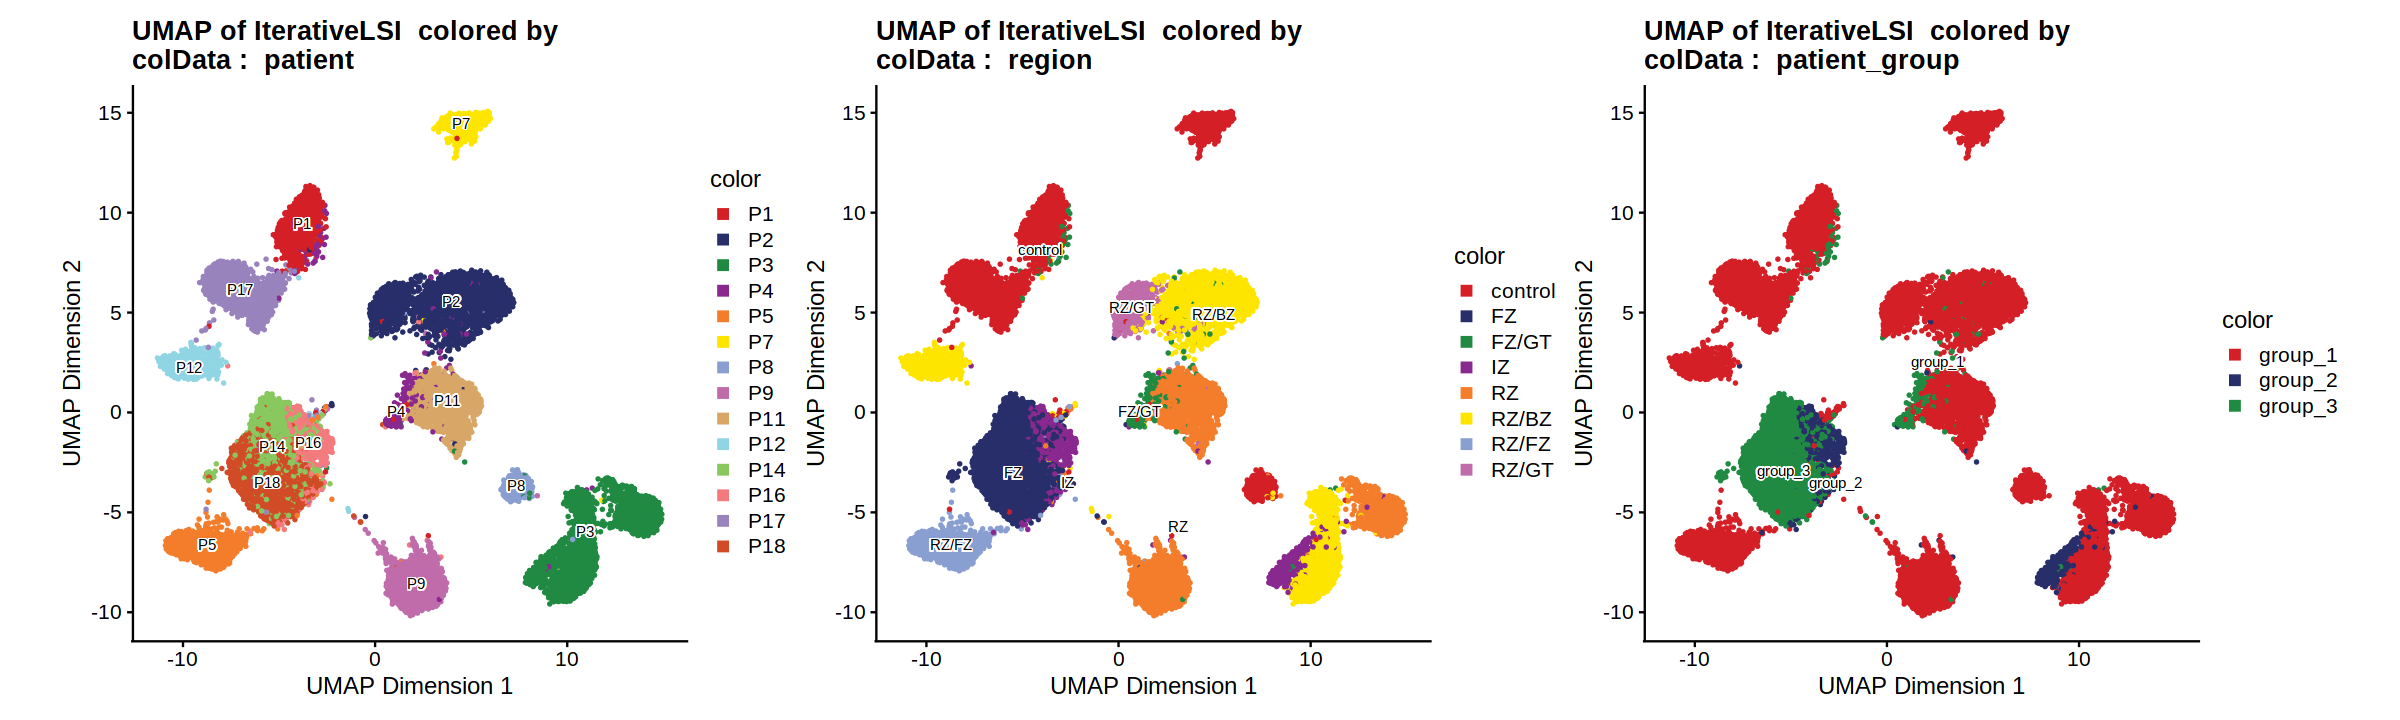

In [9]:
p1 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient", embedding = "UMAP",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p2 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "region", embedding = "UMAP",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p3 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient_group", embedding = "UMAP",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

options(repr.plot.width = 20, repr.plot.height = 6)

p1 + p2 + p3

In [12]:
proj <- addHarmony(
    ArchRProj = proj,
    reducedDims = "IterativeLSI",
    name = "Harmony",
    groupBy = c("patient", "Sample", "region"),
    force = TRUE
)

proj <- addUMAP(
    ArchRProj = proj, 
    reducedDims = "Harmony", 
    name = "UMAP_Harmony", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    verbose = FALSE,
    force = TRUE
)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations

18:57:26 Creating temp model dir /tmp/RtmpmeSQiU/dir2f40a11e8d785c

18:57:26 Creating dir /tmp/RtmpmeSQiU/dir2f40a11e8d785c

18:57:27 Changing to /tmp/RtmpmeSQiU/dir2f40a11e8d785c

18:57:27 Creating /data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Cardiomyocyte/data/snATAC/Embeddings/Save-Uwot-UMAP-Params-Harmony-2f40a16ac6a2b6-Date-2021-11-13_Time-18-57-26.tar



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2f40a137d3360f-Date-2021-11-13_Time-18-57-49.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2f40a137d3360f-Date-2021-11-13_Time-18-57-49.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2f40a1465bb7a8-Date-2021-11-13_Time-18-57-50.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2f40a1465bb7a8-Date-2021-11-13_Time-18-57-50.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2f40a14bd6c6f1-Date-2021-11-13_Time-18-57-50.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2f40a14bd6c6f1-Date-2021-11

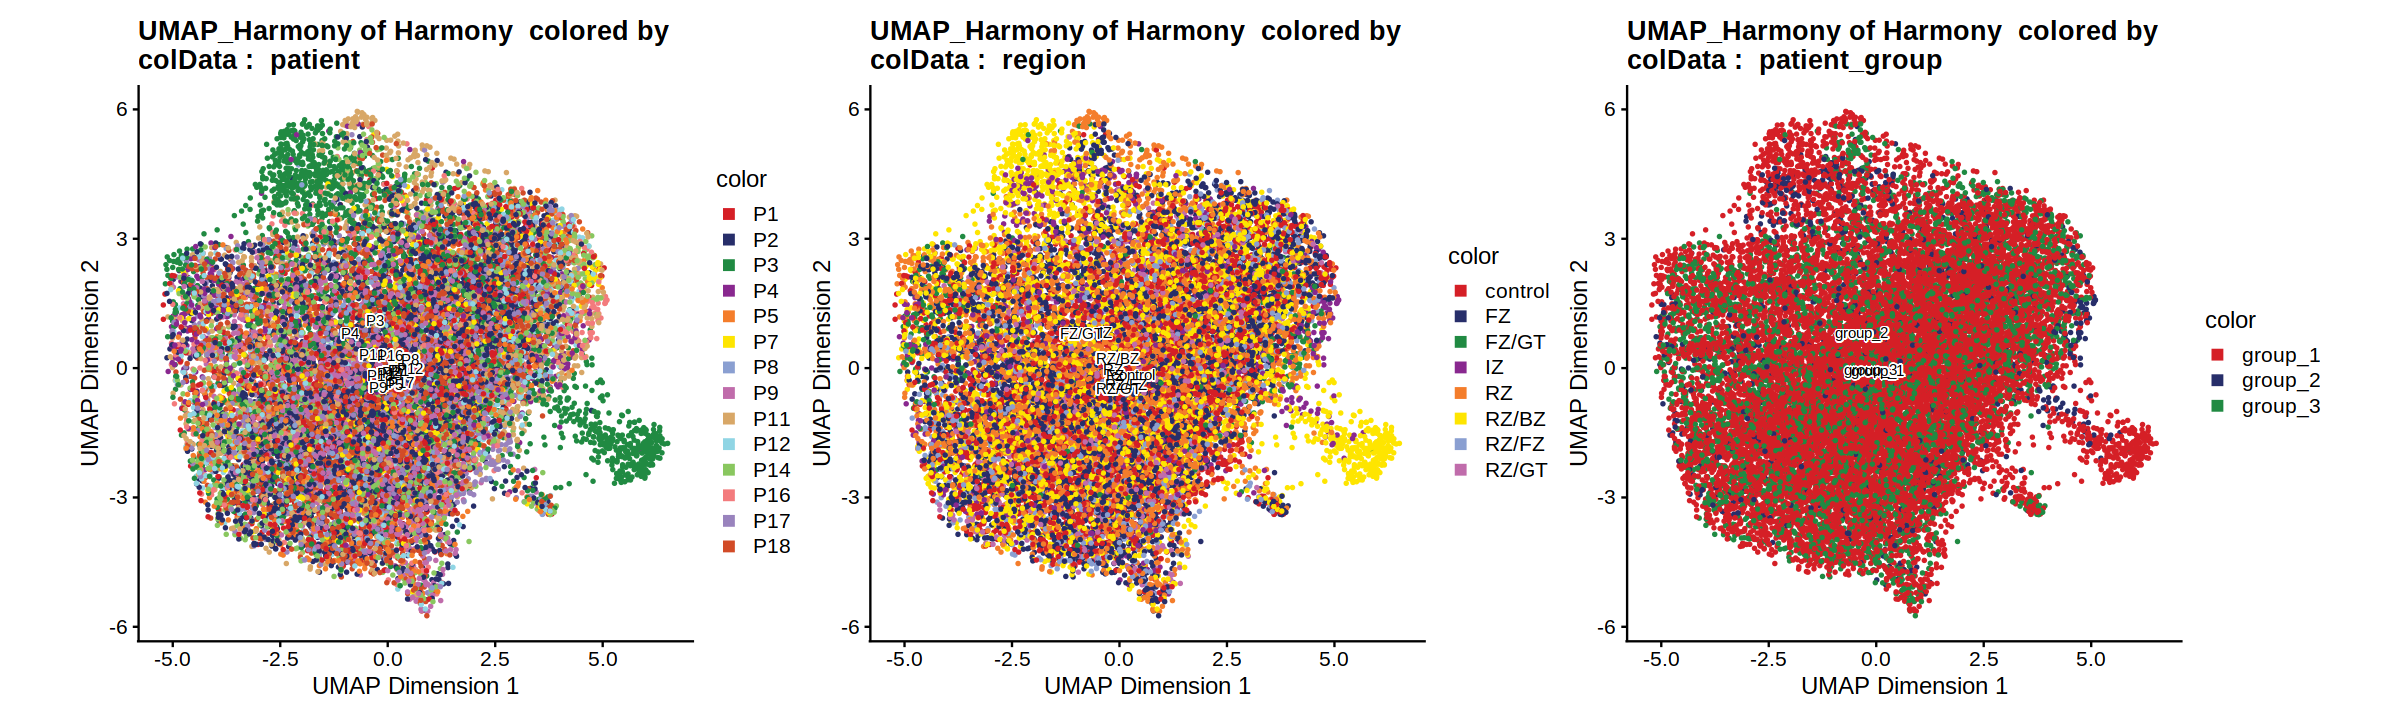

In [13]:
p1 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p2 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "region", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p3 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient_group", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

options(repr.plot.width = 20, repr.plot.height = 6)

p1 + p2 + p3

In [14]:
proj <- addImputeWeights(proj, reducedDims = "Harmony")

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-2f40a1492f06c7-Date-2021-11-13_Time-18-58-06.log
If there is an issue, please report to github with logFile!

2021-11-13 18:58:06 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2f40a1156bd749-Date-2021-11-13_Time-18-59-36.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-13 18:59:36 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 


Imputing Matrix

Using weights on disk

1 of 4

2 of 4

3 of 4

4 of 4

Using weights on disk

1 of 4

2 of 4

3 of 4

4 of 4

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2f40a1156bd749-Date-2021-11-13_Time-18-59-36.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2f40a164b289fa-Date-2021-11-13_Time-18-59-48.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-13 18:59:48 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 


Imputing Matrix

Using weights on 

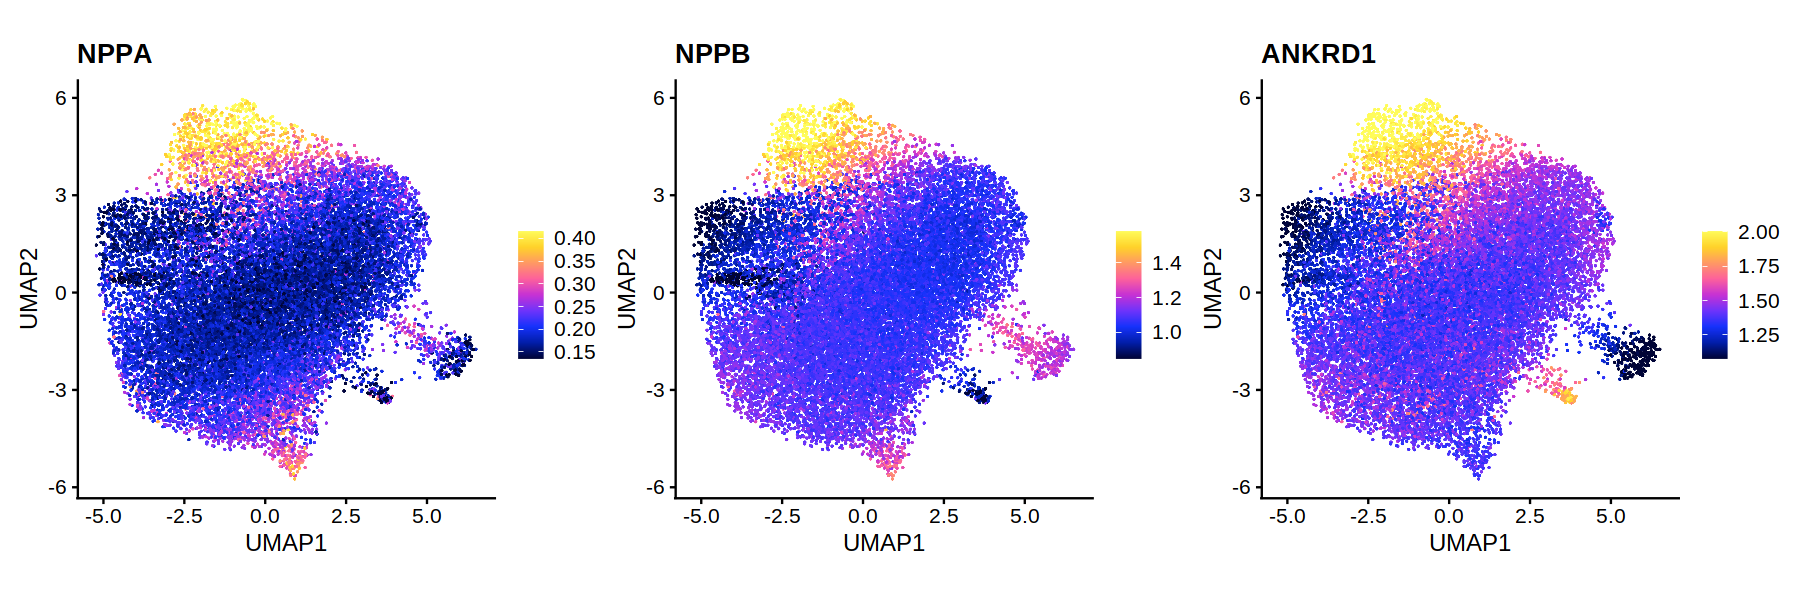

In [16]:
p1 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "NPPA",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
    xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("NPPA") +
    theme(legend.title = element_blank())

p2 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "NPPB",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
        xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("NPPB") +
        theme(legend.title = element_blank())

p3 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "ANKRD1",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
        xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("ANKRD1") +
        theme(legend.title = element_blank())


options(repr.plot.height = 5, repr.plot.width = 15)

p1 + p2 + p3

ArchR logging to : ArchRLogs/ArchR-addClusters-2f40a179e7f6d9-Date-2021-11-13_Time-19-00-49.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Clusters

2021-11-13 19:00:50 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Warning message:
“The following arguments are not used: row.names”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 20502
Number of edges: 538843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8269
Number of communities: 9
Elapsed time: 2 seconds


1 singletons identified. 8 final clusters.

2021-11-13 19:01:20 : Testing Biased Clusters, 0.514 mins elapsed.

2021-11-13 19:01:21 : Testing Outlier Clusters, 0.516 mins elapsed.

2021-11-13 19:01:21 : Assigning Cluster Names to 8 Clusters, 0.516 mins elapsed.

2021-11-13 19:01:21 : Finished addClusters, 0.518 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2f40a1aca920e-Date-2021-11-13_Time-19-01-21.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2f40a1aca920e-Date-2021-11-13_Time-19-01-21.log



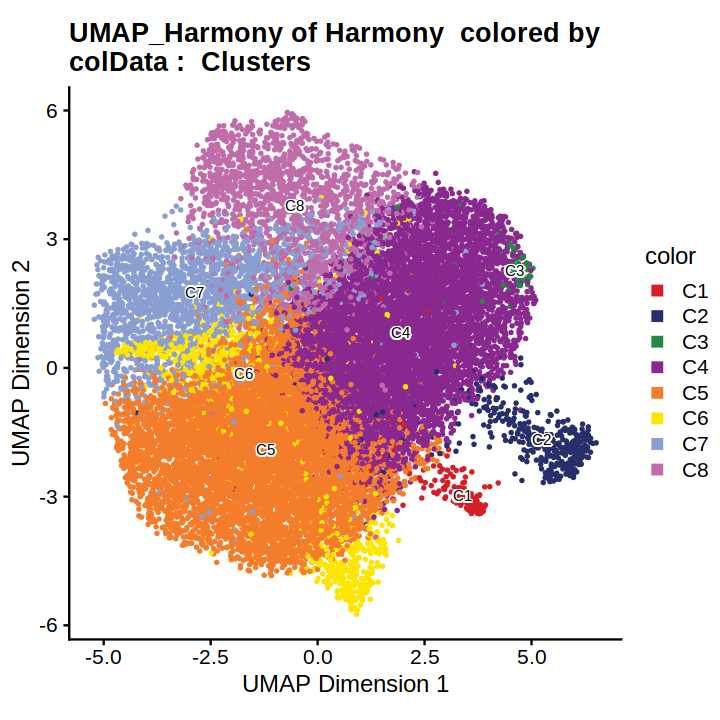

In [17]:
## clustering
proj <- addClusters(
    input = proj,
    reducedDims = "Harmony",
    method = "Seurat",
    name = "Clusters",
    resolution = 0.4,
    force = TRUE
)

p1 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "Clusters", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

options(repr.plot.height = 6, repr.plot.width = 6)

p1

In [18]:
table(proj@cellColData$Clusters)


  C1   C2   C3   C4   C5   C6   C7   C8 
 171  416   65 7508 7482  976 2045 1839 

In [19]:
cM <- confusionMatrix(paste0(proj$Clusters), paste0(proj$Sample))
cM

   [[ suppressing 19 column names ‘CK171’, ‘CK167’, ‘CK380’ ... ]]



8 x 19 sparse Matrix of class "dgCMatrix"
                                                                            
C7  287  79 173  69 100 124 206  346  42 130  55  80  41  61  57  13  19  29
C4 1254 457 429  93 440 684 638 1017 153 417 325 312 232 296 304 149  69 108
C5 1100 493 427 148 434 599 901 1119 153 252 399 216 201 245 414 126  56 156
C8  134  32 224 549  98  58  51  130  53 116  41   6  35  11  63  47 155  21
C6  104  73  24  20  90  48 181  132  53  22  29  33   8  22  69  10   4  34
C1   26  13  11  13  17   4  14   14   5  14   5   7   7   5   1   6   2   1
C2    .   .   . 340   .   .   .    1   .  12   .   .   .   1   .   .  52   .
C3    .   .   .   .   .  16   .    1   3   .   .   .  32   .   8   .   .   4
      
C7 134
C4 131
C5  43
C8  15
C6  20
C1   6
C2  10
C3   1

In [20]:
saveArchRProject(ArchRProj = proj, 
                 load = FALSE)

Saving ArchRProject...



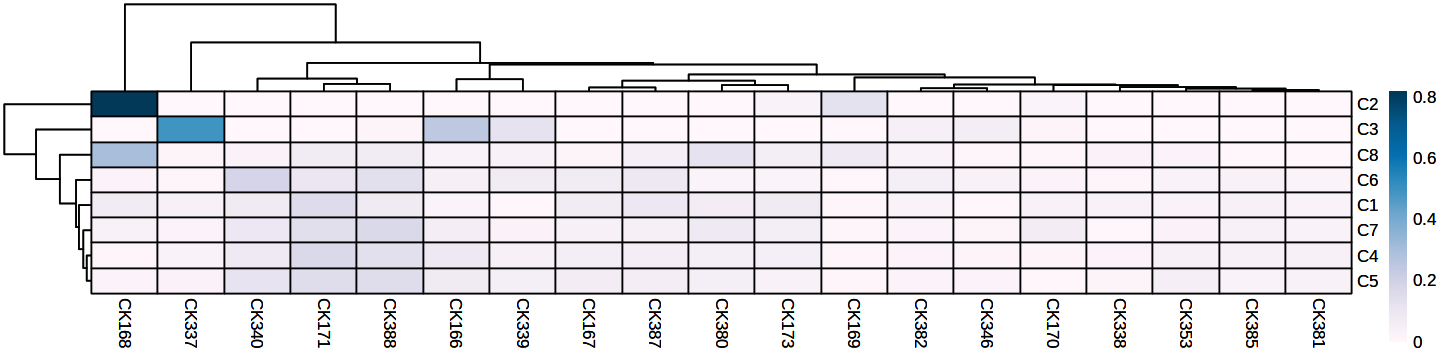

In [21]:
options(repr.plot.width = 12, repr.plot.height = 3)

library(pheatmap)
cM <- cM / Matrix::rowSums(cM)
p <- pheatmap::pheatmap(
    mat = as.matrix(cM), 
    color = paletteContinuous("whiteBlue"), 
    border_color = "black"
)
p

In [34]:
meta.data <- as.data.frame(proj@cellColData)
head(meta.data)

,Sample,TSSEnrichment,ReadsInTSS,ReadsInPromoter,ReadsInBlacklist,PromoterRatio,PassQC,NucleosomeRatio,nMultiFrags,nMonoFrags,⋯,BlacklistRatio,DoubletScore,DoubletEnrichment,ReadsInPeaks,FRIP,Clusters,region,patient,patient_region_id,patient_group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
CK171#CGGACCAGTGAGTTGG-1,CK171,8.143,14192,16121,569,0.12540646,1,0.3030125,2203,49328,⋯,0.004426293,0.000000,0.36,51477,0.4009175,C4,RZ/BZ,P2,RZ/BZ_P2,group_1
CK171#AAAGGGCAGGTAGGAA-1,CK171,7.651,16340,19824,515,0.15509310,1,0.6512079,6173,38705,⋯,0.004029103,0.000000,0.88,61851,0.4845055,C4,RZ/BZ,P2,RZ/BZ_P2,group_1
CK171#TCTAGTTTCCACCTAC-1,CK171,9.404,15339,17034,600,0.14755973,1,0.6799779,5878,34357,⋯,0.005197595,89.581130,5.28,55486,0.4814654,C4,RZ/BZ,P2,RZ/BZ_P2,group_1
CK171#GTAGTACAGGCCTAAG-1,CK171,7.601,11273,13899,442,0.14881475,1,0.6014197,5138,29161,⋯,0.004732435,1.636976,1.72,41855,0.4486355,C4,RZ/BZ,P2,RZ/BZ_P2,group_1
CK171#GGGTCTGTCGGGTCCA-1,CK171,5.805,4151,5543,678,0.06423539,1,0.3171938,2011,32756,⋯,0.007857044,0.000000,0.60,18755,0.2181169,C3,RZ/BZ,P2,RZ/BZ_P2,group_1
CK171#TTCGATTGTGCAACAG-1,CK171,5.695,6091,7986,530,0.09531198,1,0.4953064,3363,28017,⋯,0.006325488,28.944902,3.20,27099,0.3237944,C3,RZ/BZ,P2,RZ/BZ_P2,group_1


In [36]:
cols <- ArchR::paletteDiscrete(meta.data$Clusters)

`summarise()` has grouped output by 'patient'. You can override using the `.groups` argument.



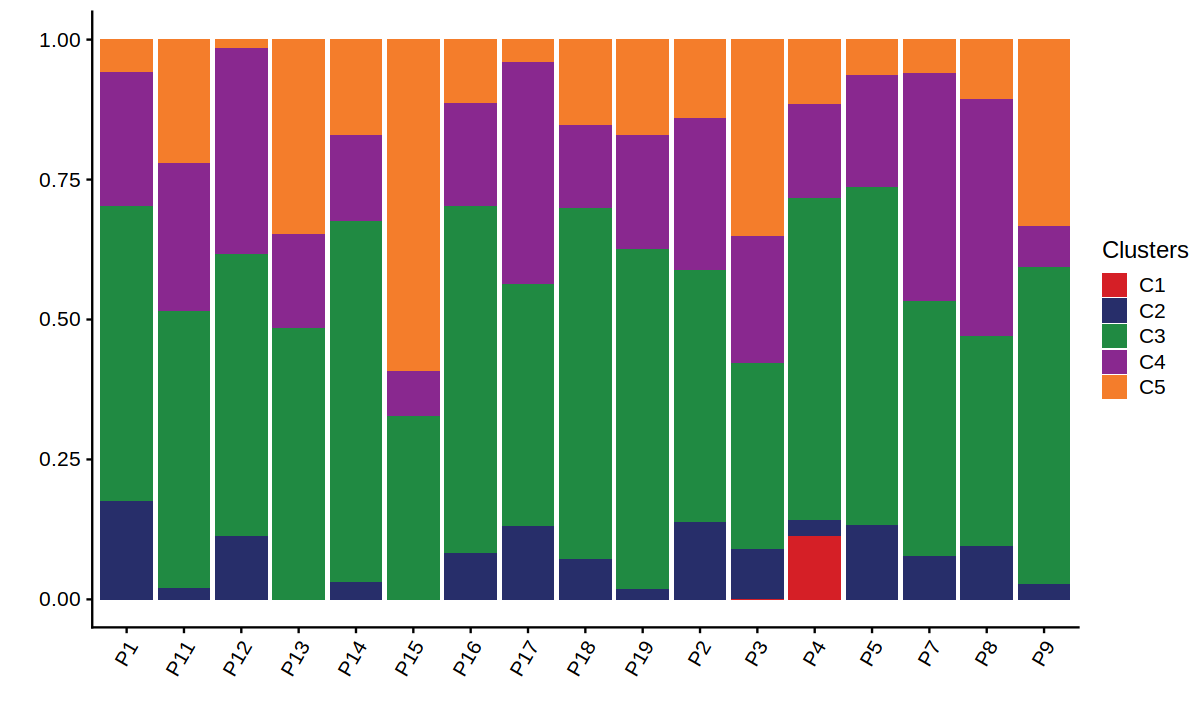

In [38]:
df_plot <- meta.data %>%
    group_by(patient, Clusters) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(patient, cell_proportion, fill=Clusters)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 10, repr.plot.height = 6)

p1

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.



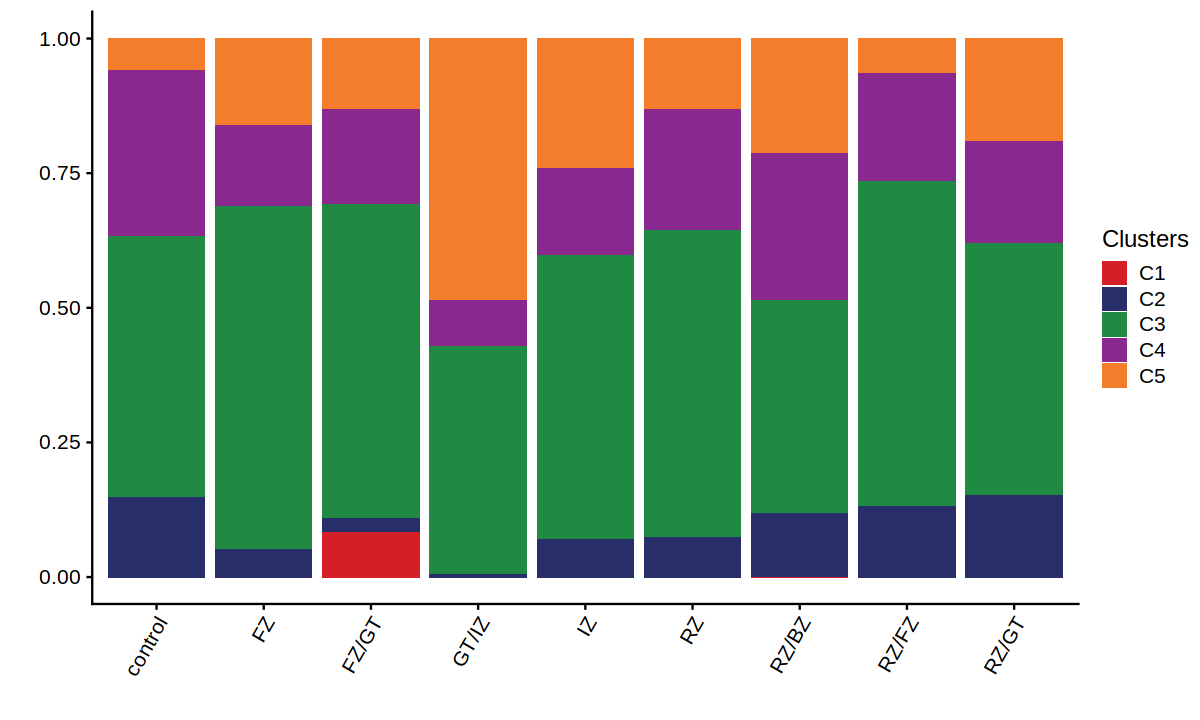

In [42]:
df_plot <- meta.data %>%
    group_by(region, Clusters) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(region, cell_proportion, fill=Clusters)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 10, repr.plot.height = 6)

p1

`summarise()` has grouped output by 'patient_group'. You can override using the `.groups` argument.



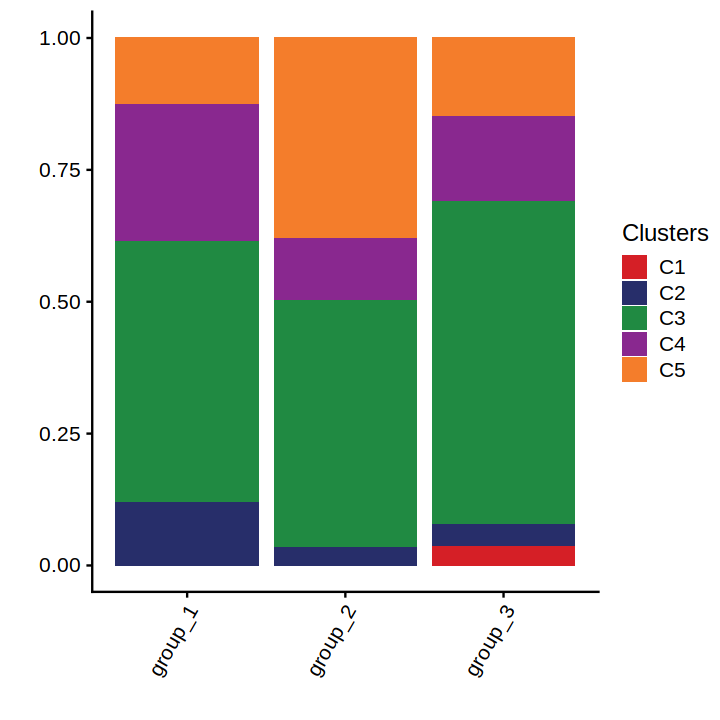

In [41]:
df_plot <- meta.data %>%
    group_by(patient_group, Clusters) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(patient_group, cell_proportion, fill=Clusters)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 6, repr.plot.height = 6)

p1

In [15]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 8

Matrix products: default
BLAS/LAPACK: /home/rs619065/miniconda3/envs/r-4.0.3/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] gtable_0.3.0                gridExtra_2.3              
 [3] uwot_0.1.10                 cowplot_1.1.1              
 [5] dplyr_1.0.7                 harmony_1.0                
 [7] Rcpp_1.0.7                  Signac_1.4.0               
 [9] SeuratObject_4.0.2  